<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epid_3_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos. En este caso, es tardado subir el archivo porque es muy pesaso. Consideramos sólo las columnas correspondientes a fechas de ingreso, inicio de sintomas y defunción.

In [127]:
B1=pd.read_csv('201006COVID19MEXICO.csv',usecols=['FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF'], encoding='latin-1')

In [128]:
print(B1)#

        FECHA_INGRESO FECHA_SINTOMAS   FECHA_DEF
0          2020-03-31     2020-03-28  9999-99-99
1          2020-04-01     2020-03-28  9999-99-99
2          2020-03-14     2020-03-11  9999-99-99
3          2020-03-18     2020-03-17  9999-99-99
4          2020-02-27     2020-02-22  9999-99-99
...               ...            ...         ...
2021250    2020-10-04     2020-09-30  9999-99-99
2021251    2020-10-05     2020-10-01  9999-99-99
2021252    2020-10-05     2020-10-03  9999-99-99
2021253    2020-10-05     2020-10-01  9999-99-99
2021254    2020-10-05     2020-10-03  9999-99-99

[2021255 rows x 3 columns]


Notemos las dimensiones: 2,021,255 filas. (Número de registros.)

In [188]:
dia_f

'2020-10-06'

In [186]:
dia0=np.min(B1['FECHA_SINTOMAS'])
dia_f=np.max(B1['FECHA_SINTOMAS'])
print("Numero de dias registrados: ",(pd.to_datetime(dia_f)-pd.to_datetime(dia0)).days)

Numero de dias registrados:  279


In [189]:
#Semanas
Num_semanas=int((pd.to_datetime(dia_f)-pd.to_datetime(dia0)).days/7)+1
vec_semanas=[str(pd.to_datetime(dia0) + pd.to_timedelta(7*i, unit='d'))[0:10] for i in range(0,Num_semanas+1)]

Mostramos un vector con los dias finales de cada semana considerada.

In [193]:
print(len(vec_semanas))

41


In [191]:
print(Num_semanas)

40


Ahora, calcularemos la frecuencia por semana de los registros de inicio de sintomas.

In [199]:
ocurrencias=np.zeros(Num_semanas)
for fecha in B1['FECHA_SINTOMAS']:
    for k in range(1,len(ocurrencias)+1):#Esto se puede optimizar.
        if(fecha<vec_semanas[k] and fecha>=vec_semanas[k-1]):
            ocurrencias[k-1]+=1 
            break;

In [200]:
print(np.sum(ocurrencias))#Sí es particion.

2021255.0


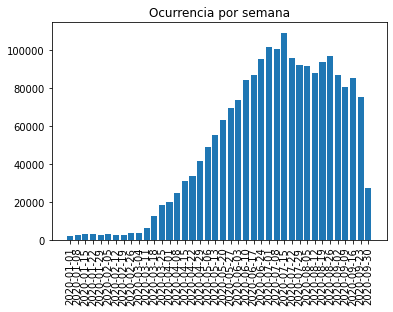

In [215]:
plt.bar(vec_semanas[0:-1],ocurrencias)
plt.xticks(rotation=90)
plt.title('Ocurrencia por semana')
plt.show()